# Test for Machine Learning Pipeline

First we need to upload some data using the upload feature in the home page ... or we can get it from the internet

In [1]:
#Place holder for getting data from s3 if necessary, details need to be worked out

This is an example of a CNN architecture that exist (from pyimagesearch.com) that uses a street sign dataset from Germany to classify street signs, just like what we wish to do for Zumi

In [2]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

class TrafficSignNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# CONV => RELU => BN => POOL
		model.add(Conv2D(8, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# first set of (CONV => RELU => CONV => RELU) * 2 => POOL
		model.add(Conv2D(16, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(16, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# first set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# second set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

## Train

Since this is only a test and this particular server is small and not powerful (a.k.a free) we will not be running actual training for this example.

## Predict

[INFO] loading model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         608       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (No

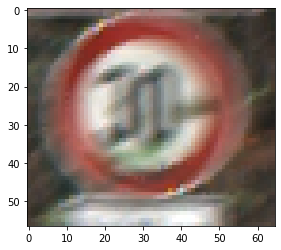

Speed limit (30km/h)


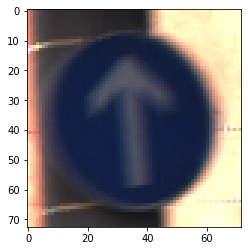

Ahead only


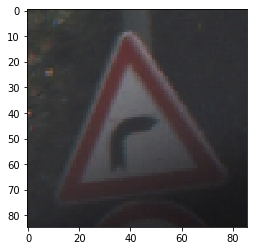

Dangerous curve to the right


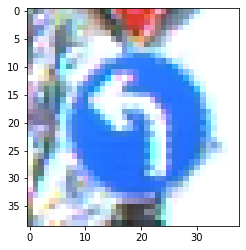

Turn left ahead


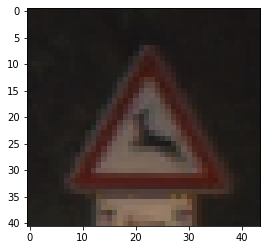

Wild animals crossing


In [3]:
# import the necessary packages
from tensorflow.keras.models import load_model
from skimage import transform
from skimage import exposure
from skimage import io
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

# load the traffic sign recognizer model
print("[INFO] loading model...")
model = load_model('trafficsignnet.model')
model.summary()
# load the label names
labelNames = open("signnames.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

# grab the paths to the input images, shuffle them, and grab a sample
print("[INFO] predicting...")
imagePaths = list(paths.list_images('/home/jupyter-juanadmin/Images'))
random.shuffle(imagePaths)
imagePaths = imagePaths[:5]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# load the image, resize it to 32x32 pixels, and then apply
	# Contrast Limited Adaptive Histogram Equalization (CLAHE),
	# just like we did during training
	image = io.imread(imagePath)
	image = transform.resize(image, (32, 32))
	image = exposure.equalize_adapthist(image, clip_limit=0.1)

	# preprocess the image by scaling it to the range [0, 1]
	image = image.astype("float32") / 255.0
	image = np.expand_dims(image, axis=0)

	# make predictions using the traffic sign recognizer CNN
	preds = model.predict(image)
	j = preds.argmax(axis=1)[0]
	label = labelNames[j]
    
	# load the image using OpenCV, resize it, and draw the label
	# on it
	#image = cv2.imread(imagePath)
	#image = imutils.resize(image, width=128)
	#cv2.putText(image, label, (5, 15), cv2.FONT_HERSHEY_SIMPLEX,
	#	0.45, (0, 0, 255), 2)

	#cv2.imshow("test",image)
	img = mpimg.imread(imagePath)
	imgplot = plt.imshow(img)
	plt.show()    
	print(label)